Data source: https://www.kaggle.com/mirichoi0218/insurance/downloads/insurance.zip/1

# Introduction

Health insurance in India is a growing segment of India's economy. The Indian health system is one of the largest in the world, with the number of people it concerns: nearly 1.3 billion potential beneficiaries. The health industry in India has rapidly become one of the most important sectors in the country in terms of income and job creation. In 2018, one hundred million Indian households (500 million people) do not benefit from health coverage. In 2011, 3.9%[1] of India's gross domestic product was spent in the health sector.

According to the World Health Organization (WHO), this is among the lowest of the BRICS (Brazil, Russia, India, China, South Africa) economies. Policies are available that offer both individual and family cover. Out of this 3.9%, health insurance accounts for 5-10% of expenditure, employers account for around 9% while personal expenditure amounts to an astounding 82%.

In the year 2016, the NSSO released the report “Key Indicators of Social Consumption in India: Health” based on its 71st round of surveys. The survey carried out in the year 2014 found out that, more than 80% of Indians are not covered under any health insurance plan, and only 18% (government funded 12%) of the urban population and 14% (government funded 13%) of the rural population was covered under any form of health insurance.

India's public health expenditures are lower than those of other middle-income countries. In 2012, they accounted for 4% of GDP, which is half as much as in China with 5.1%. In terms of public health spending per capita, India ranks 184th out of 191 countries in 2012. Patients' remaining costs represent about 58% of the total.[4] The remaining costs borne by the patient represent an increasing share of the household budget, from 5% of this budget in 2000 to over 11% in 2004-2005.[5] On average, the remaining costs of poor households as a result of hospitalization accounted for 140% of their annual income in rural areas and 90% in urban areas.

This financial burden has been one of the main reasons for the introduction of health insurance covering the hospital costs of the poorest.

# Data Description:

The data at hand contains medical costs of people characterized by certain attributes.

# Domain:
Healthcare

# Context:
Leveraging customer information is paramount for most businesses. In the case of an insurance company, attributes of customers like the ones mentioned below can be crucial in making business decisions. Hence, knowing to explore and
generate value out of such data can be an invaluable skill to have.

# Attribute Information:

- age : age of primary beneficiary
- sex : insurance contractor gender, female, male
- bmi : Body mass index, providing an understanding of body,
- weights that are relatively high or low relative to height,
- objective index of body weight (kg / m ^ 2) using the ratio of
- height to weight, ideally 18.5 to 24.9
- children : Number of children covered by health insurance /
- Number of dependents
- smoker : Smoking
- region : the beneficiary's residential area in the US, northeast,southeast, southwest, northwest.
- charges : Individual medical costs billed by health insurance.

## Import all the necessary libraries

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# To ignore warnings
from warnings import filterwarnings
filterwarnings("ignore")

# Command to tell Python to actually display the graphs
%matplotlib inline

# To make use of statistical models
import statsmodels.api as sm
import scipy.stats as stats
import copy
import os

## Read the data into the notebook

In [2]:
df=pd.read_csv('insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


    age - continuous
    sex - categorical
    bmi - continuous
    children - categorical
    smoker - categorical
    region - categorical
    charges - continuous

## Basic EDA
* Find the shape of the data,data type of individual columns
* Check the presence of missing values
* Descriptive stats of numerical columns
* Find the distribution of numerical columns and the asssociated skeweness and presence of outliers 
* Distribution of categorical columns

In [4]:
df.shape

(1338, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Check for missing value

In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Checking the summary of dataframe

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


# Plot the Histograms

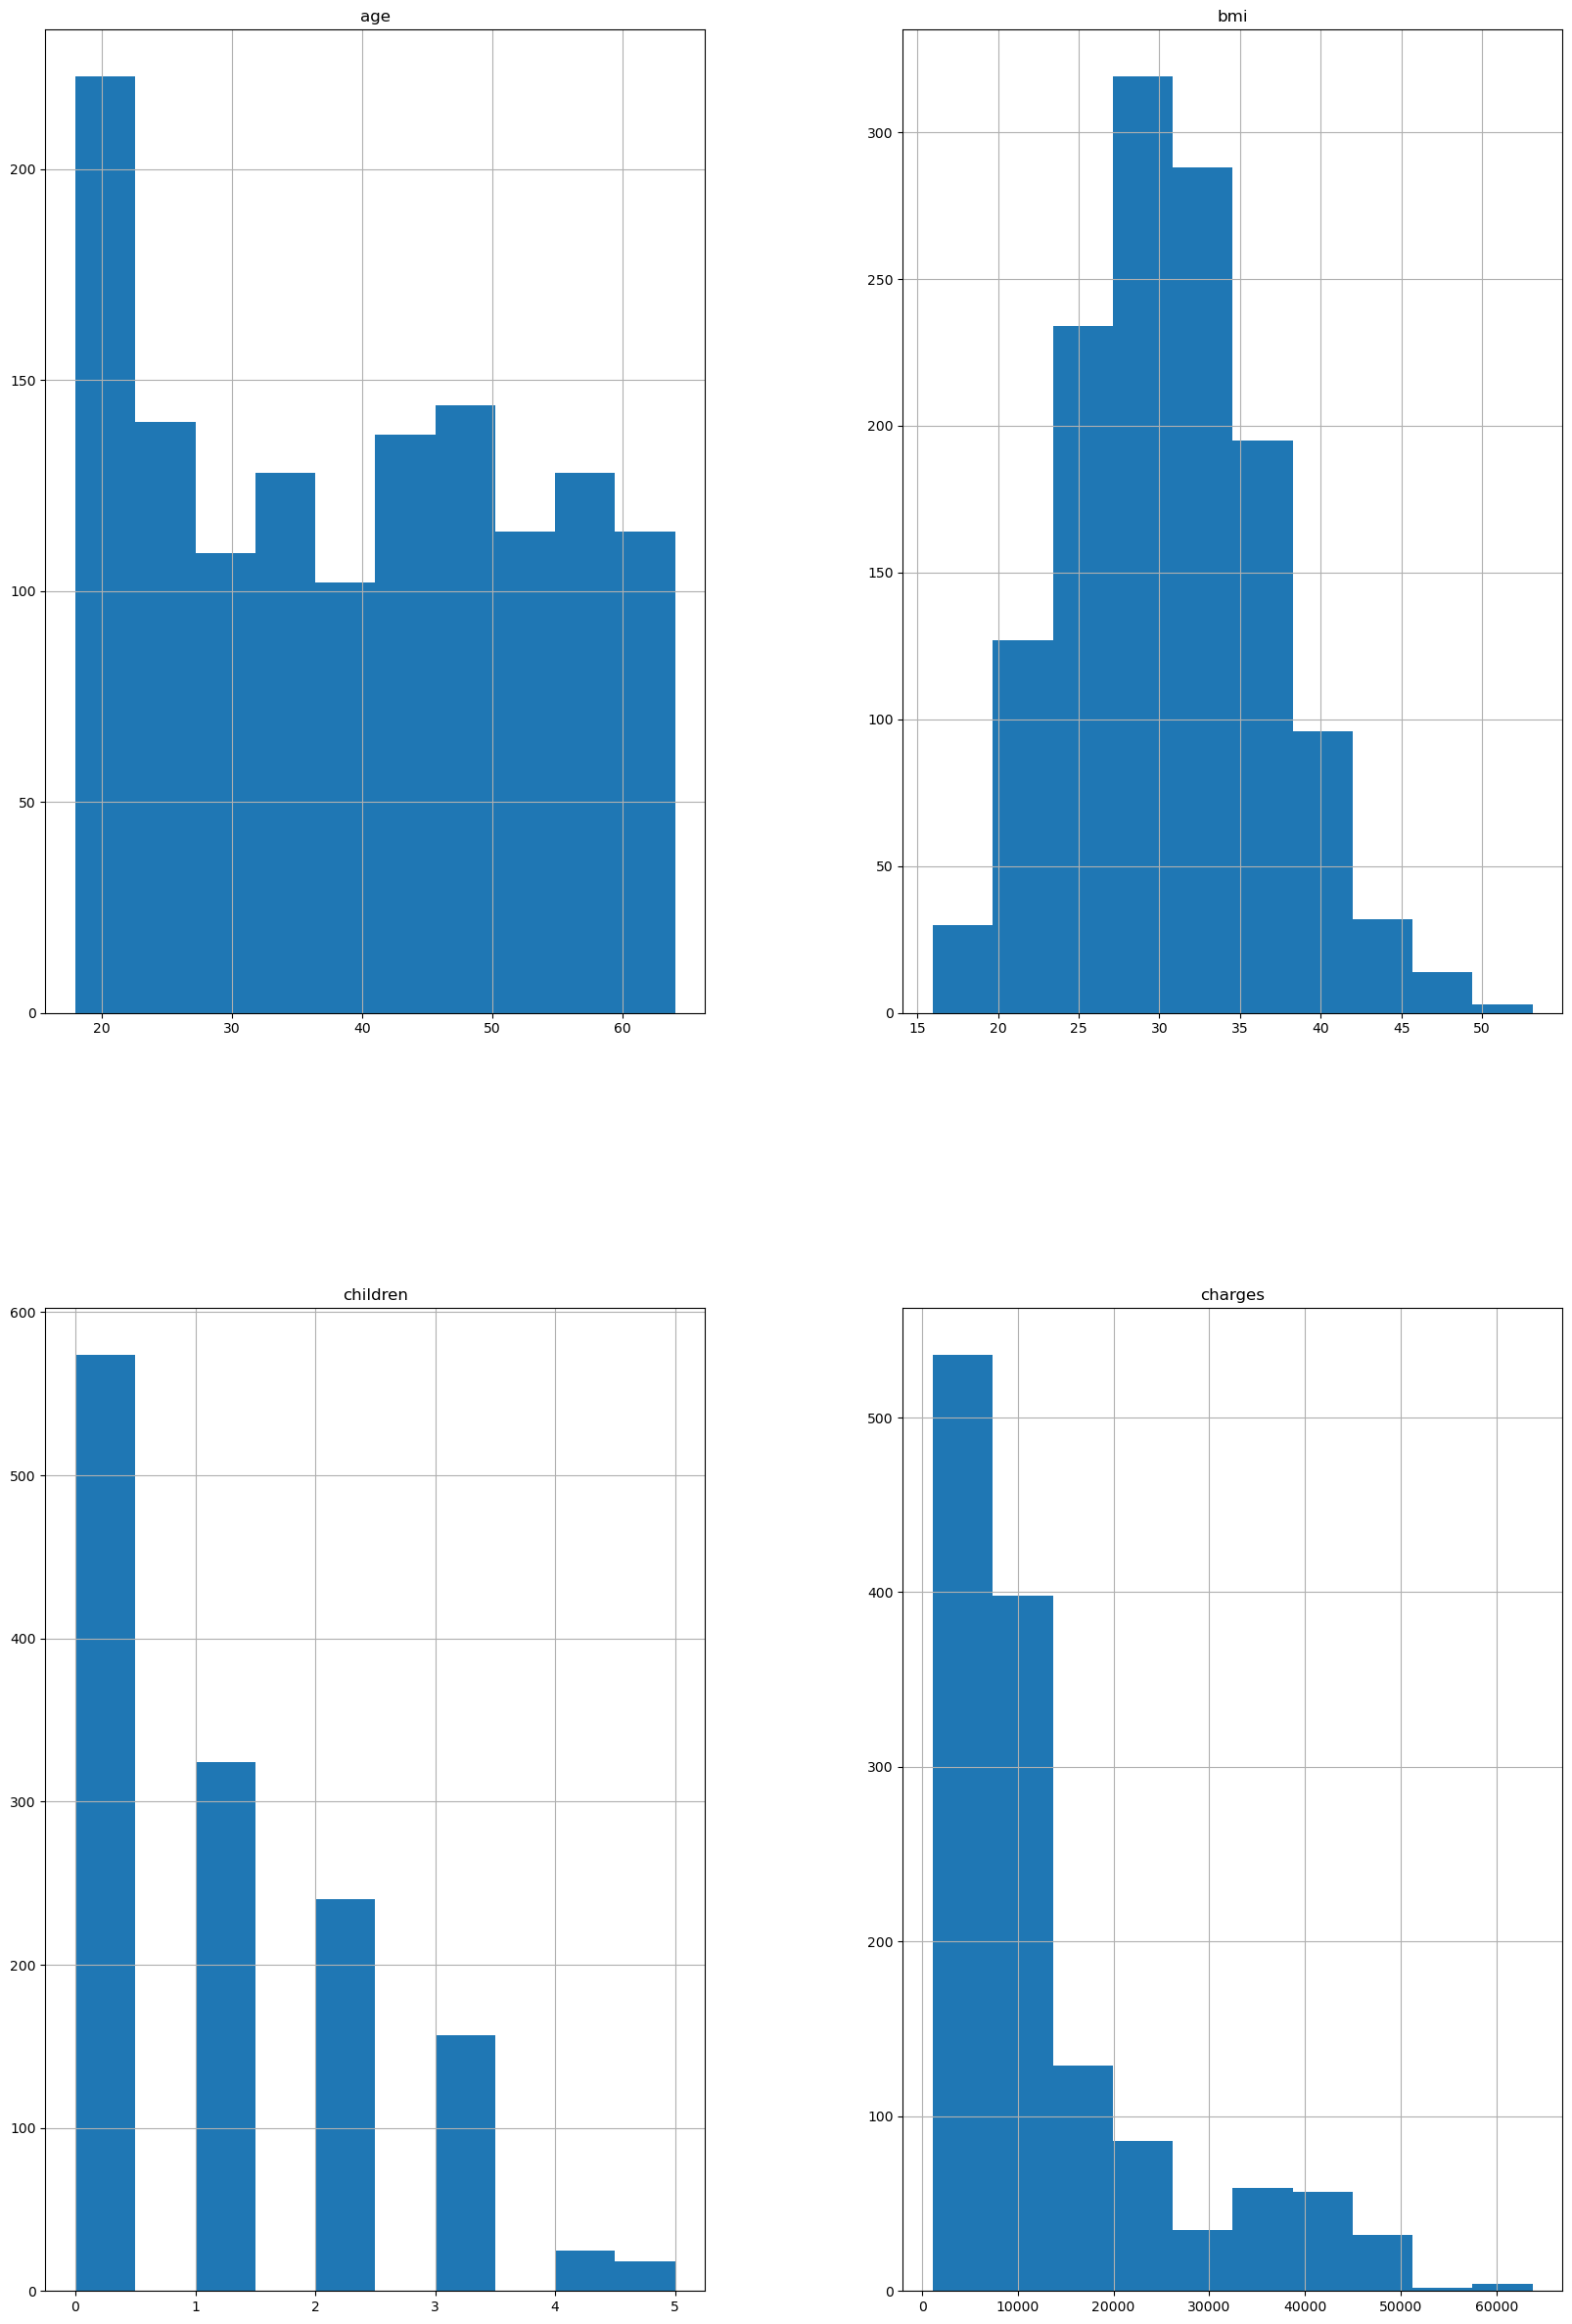

In [8]:
df.hist(figsize=(20,30));

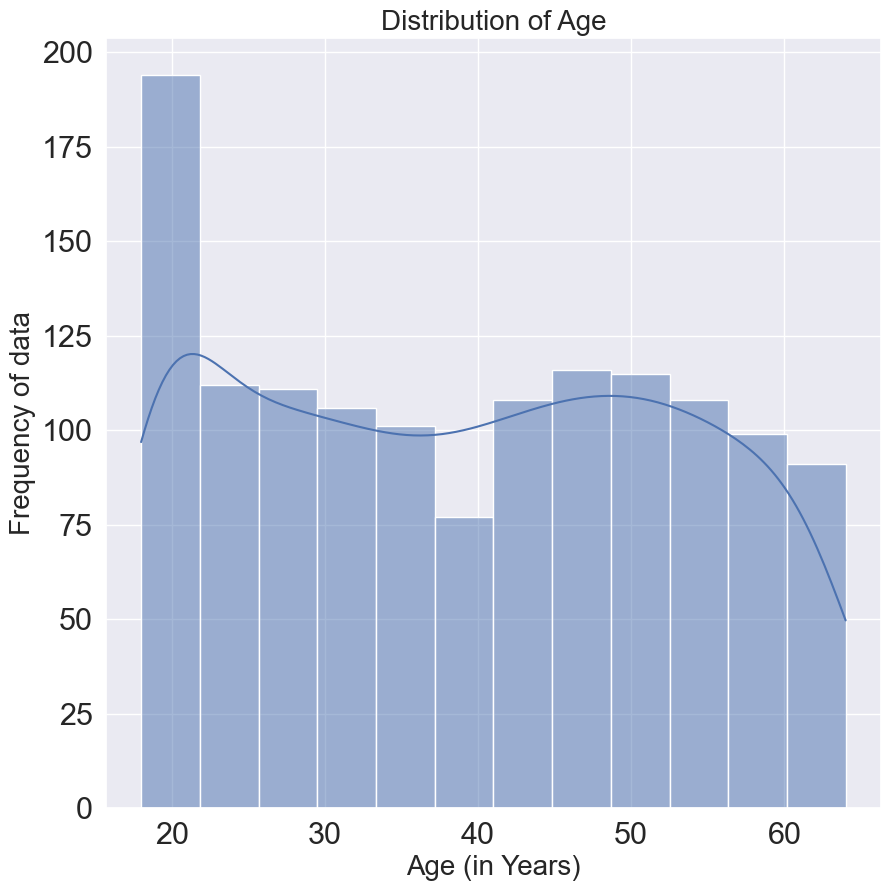

In [9]:
plt.figure(figsize=(10,10))
font = {'size':20}
sns.set(font_scale=2)
sns.histplot(data=df, x='age', kde = True);
plt.title("Distribution of Age",fontdict=font)
plt.xlabel("Age (in Years)",fontdict=font)
plt.ylabel("Frequency of data",fontdict=font)
plt.show();

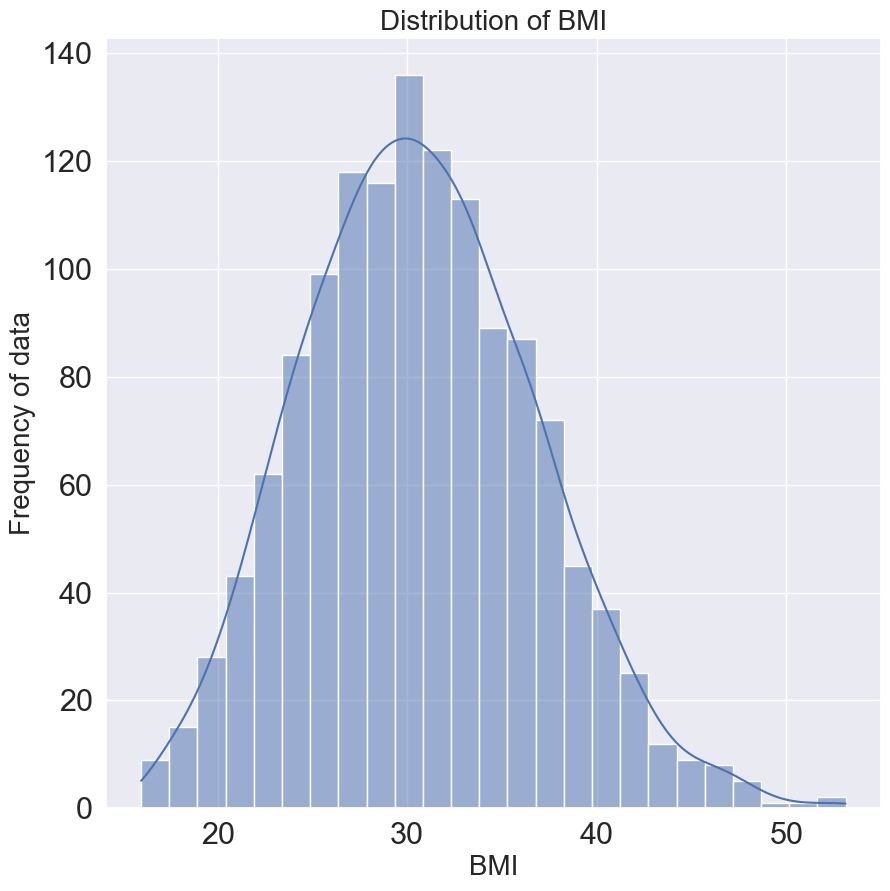

In [10]:
plt.figure(figsize=(10,10))
font = {'size':20}
sns.set(font_scale=2)
sns.histplot(data=df, x='bmi', kde = True);
plt.title("Distribution of BMI",fontdict=font)
plt.xlabel("BMI",fontdict=font)
plt.ylabel("Frequency of data",fontdict=font)
plt.show();

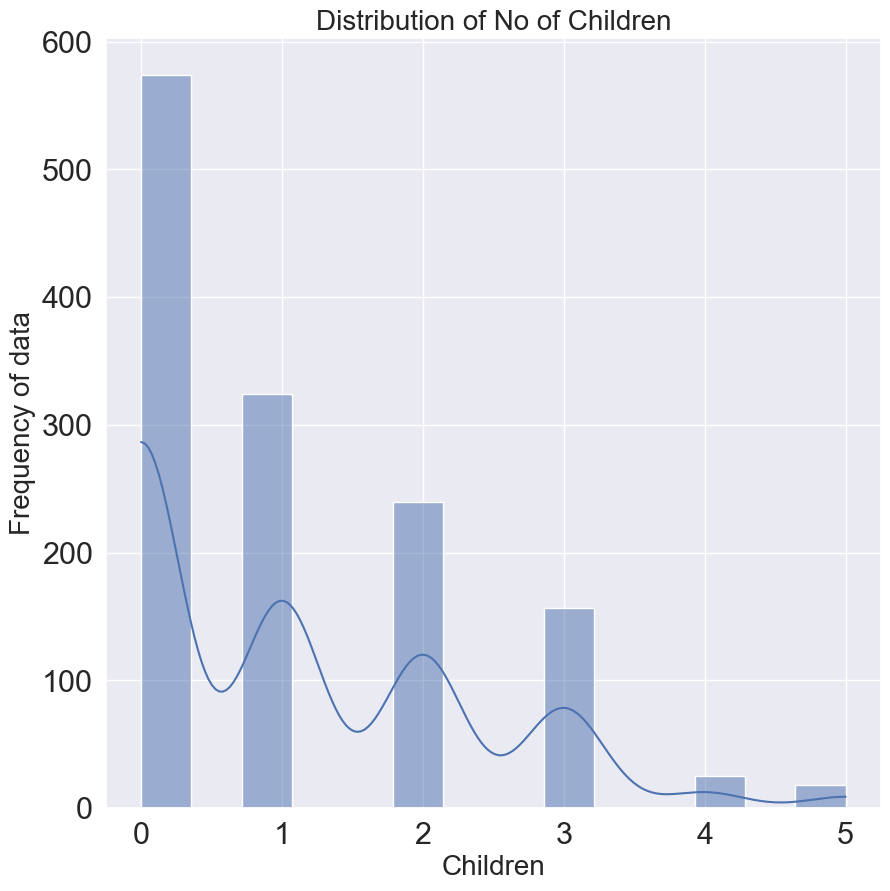

In [11]:
plt.figure(figsize=(10,10))
font = {'size':20}
sns.set(font_scale=2)
sns.histplot(data=df, x='children', kde = True);
plt.title("Distribution of No of Children",fontdict=font)
plt.xlabel("Children",fontdict=font)
plt.ylabel("Frequency of data",fontdict=font)
plt.show();

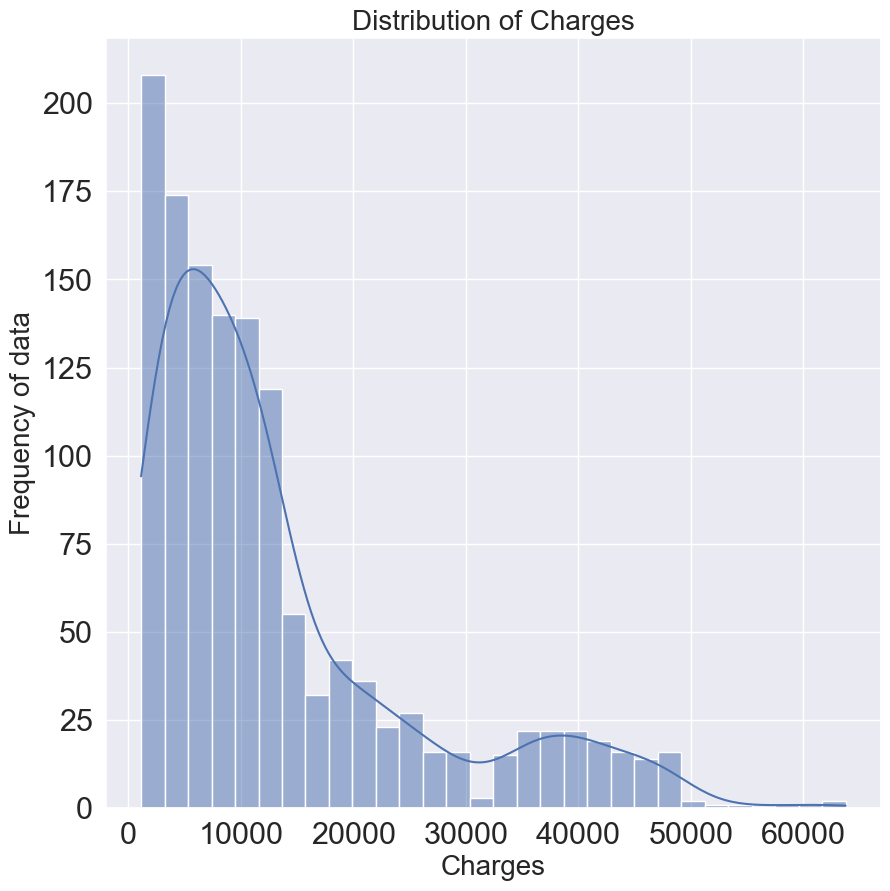

In [12]:
plt.figure(figsize=(10,10))
font = {'size':20}
sns.set(font_scale=2)
sns.histplot(data=df, x='charges', kde = True);
plt.title("Distribution of Charges",fontdict=font)
plt.xlabel("Charges",fontdict=font)
plt.ylabel("Frequency of data",fontdict=font)
plt.show();

# Check Outliers

In [13]:
df.head(20)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


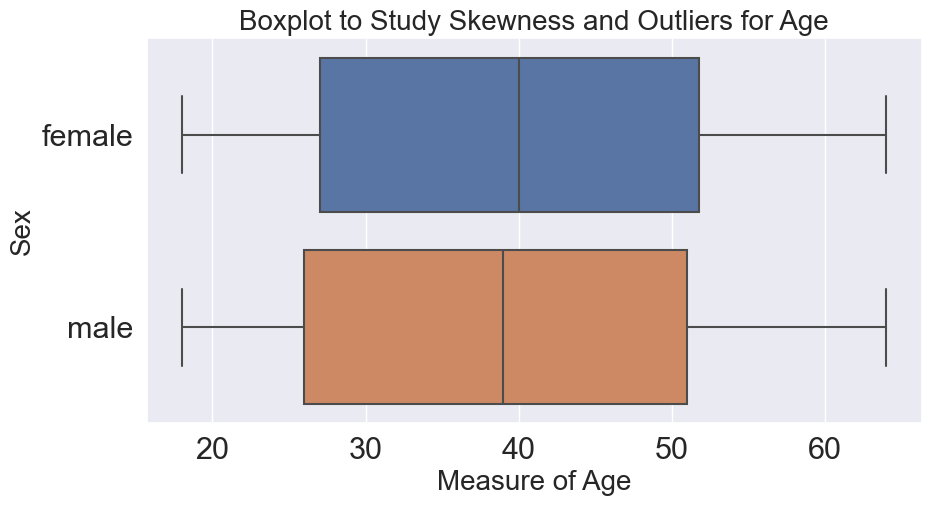

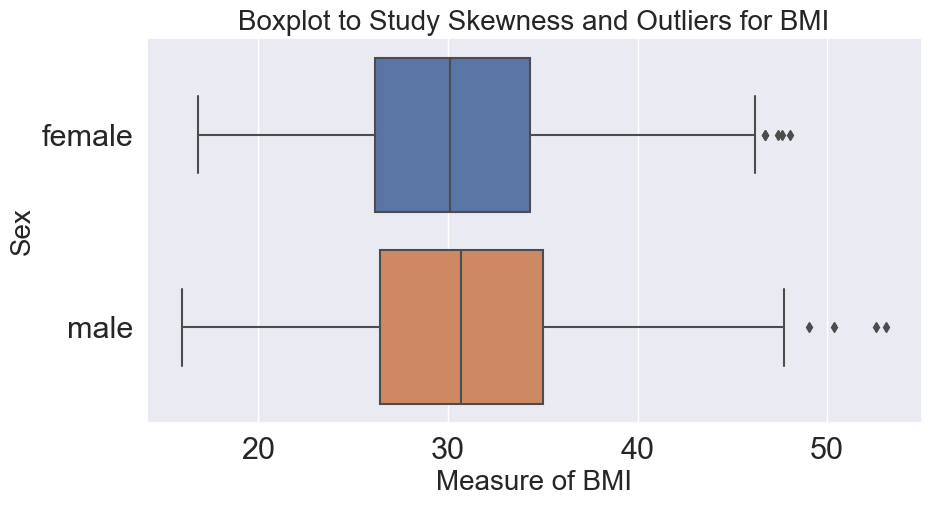

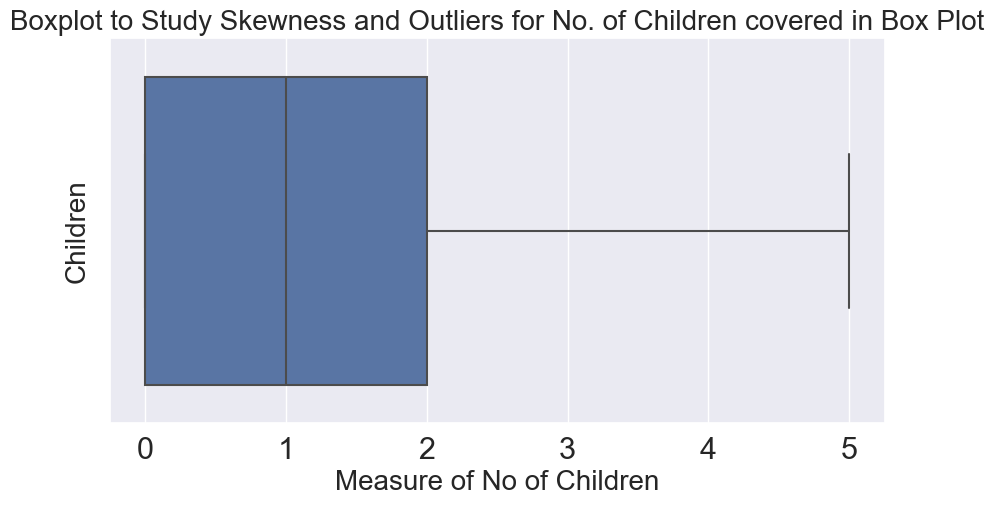

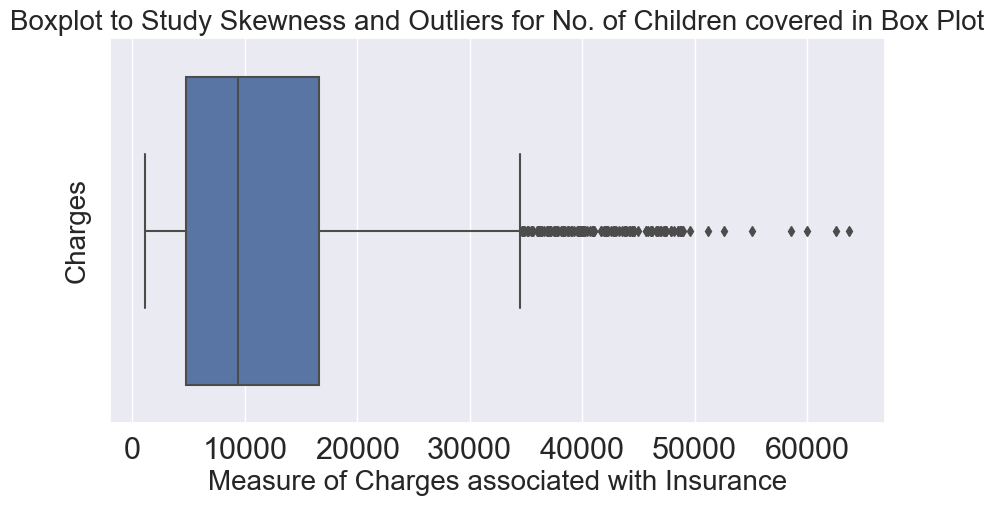

In [14]:
plt.figure(figsize=(10,5))
font = {'size':20}
sns.set(font_scale=2)
sns.boxplot(data=df, x='age', y='sex');
plt.title('Boxplot to Study Skewness and Outliers for Age', fontdict=font)
plt.xlabel('Measure of Age',fontdict=font)
plt.ylabel('Sex',fontdict=font)
plt.show();

plt.figure(figsize=(10,5))
font = {'size':20}
sns.set(font_scale=2)
sns.boxplot(data=df, x='bmi', y='sex');
plt.title('Boxplot to Study Skewness and Outliers for BMI', fontdict=font)
plt.xlabel('Measure of BMI',fontdict=font)
plt.ylabel('Sex',fontdict=font)
plt.show();

plt.figure(figsize=(10,5))
font = {'size':20}
sns.set(font_scale=2)
sns.boxplot(data=df, x='children');
plt.title('Boxplot to Study Skewness and Outliers for No. of Children covered in Box Plot', fontdict=font)
plt.xlabel('Measure of No of Children',fontdict=font)
plt.ylabel('Children',fontdict=font)
plt.show();

plt.figure(figsize=(10,5))
font = {'size':20}
sns.set(font_scale=2)
sns.boxplot(data=df, x='charges');
plt.title('Boxplot to Study Skewness and Outliers for No. of Children covered in Box Plot', fontdict=font)
plt.xlabel('Measure of Charges associated with Insurance',fontdict=font)
plt.ylabel('Charges',fontdict=font)
plt.show();

# Plot Count Plot

In [15]:
pd.crosstab(df['region'], df['sex'])

sex,female,male
region,,
northeast,161,163
northwest,164,161
southeast,175,189
southwest,162,163


In [16]:
pd.crosstab(df['region'], df['smoker'])

smoker,no,yes
region,,
northeast,257,67
northwest,267,58
southeast,273,91
southwest,267,58


In [17]:
pd.crosstab(df['sex'], df['smoker'])

smoker,no,yes
sex,,
female,547,115
male,517,159


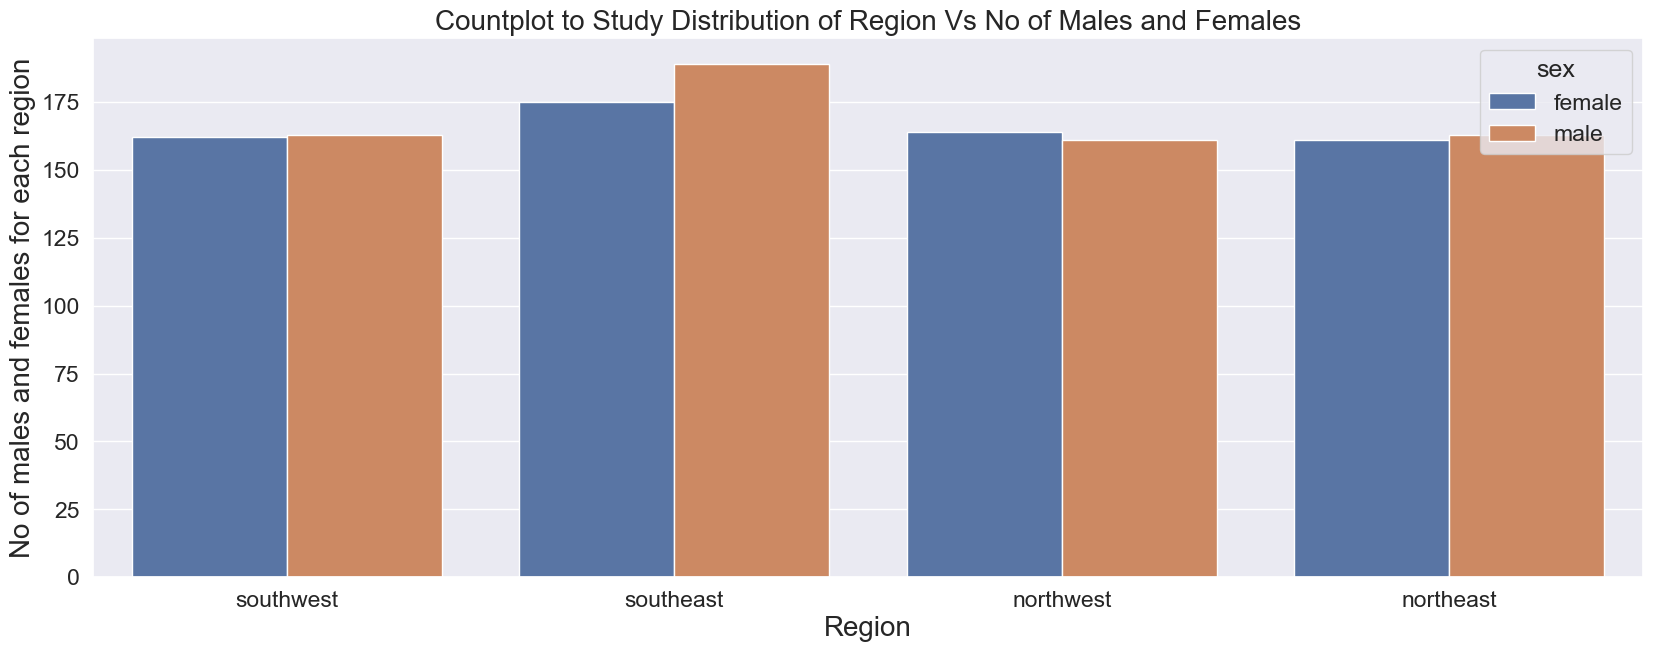

In [18]:
plt.figure(figsize=(20,7))
font = {'size':20}
sns.set(font_scale=1.5)
sns.countplot(data=df, x='region', hue='sex');
plt.title('Countplot to Study Distribution of Region Vs No of Males and Females', fontdict=font)
plt.xlabel('Region',fontdict=font)
plt.ylabel('No of males and females for each region',fontdict=font)
plt.show();

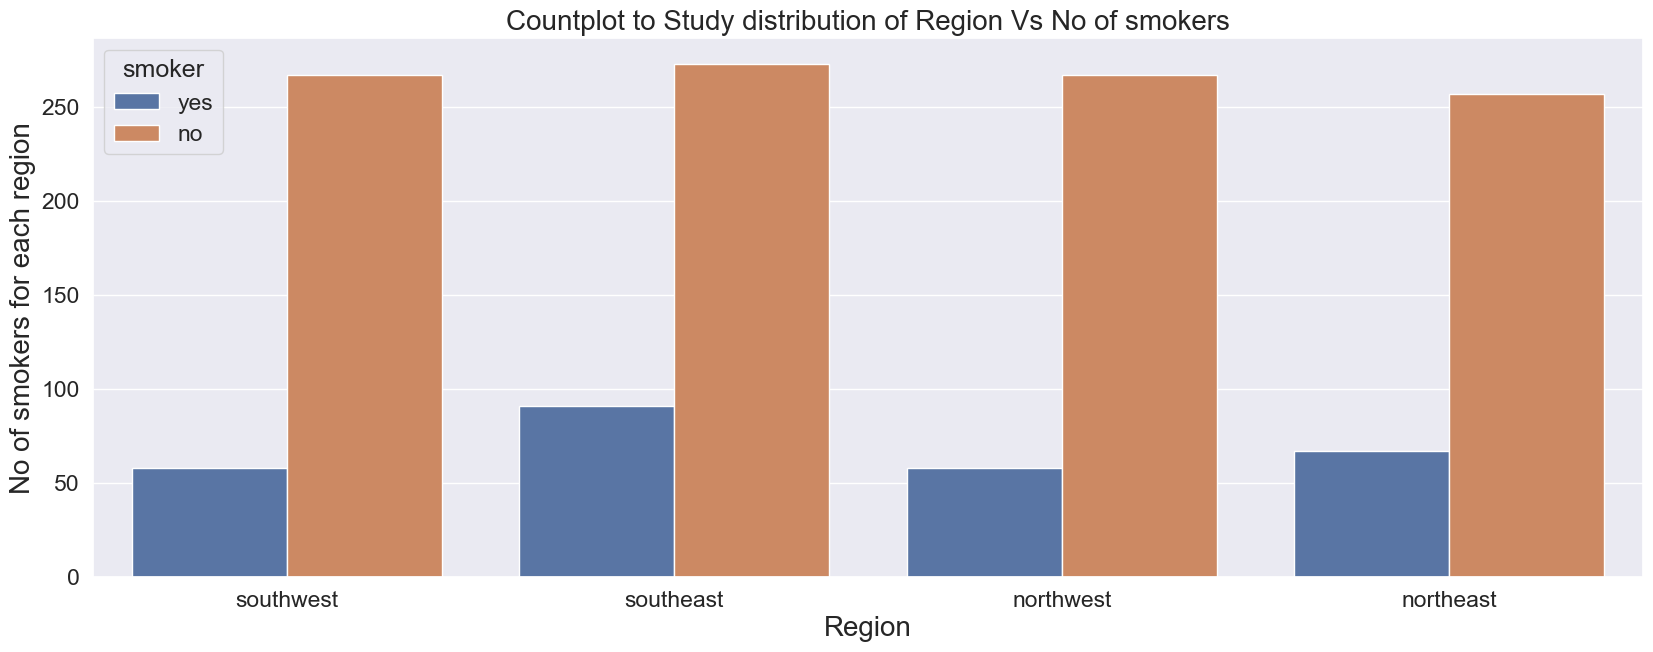

In [19]:
plt.figure(figsize=(20,7))
font = {'size':20}
sns.set(font_scale=1.5)
sns.countplot(data=df, x='region', hue='smoker');
plt.title('Countplot to Study distribution of Region Vs No of smokers', fontdict=font)
plt.xlabel('Region',fontdict=font)
plt.ylabel('No of smokers for each region',fontdict=font)
plt.show();

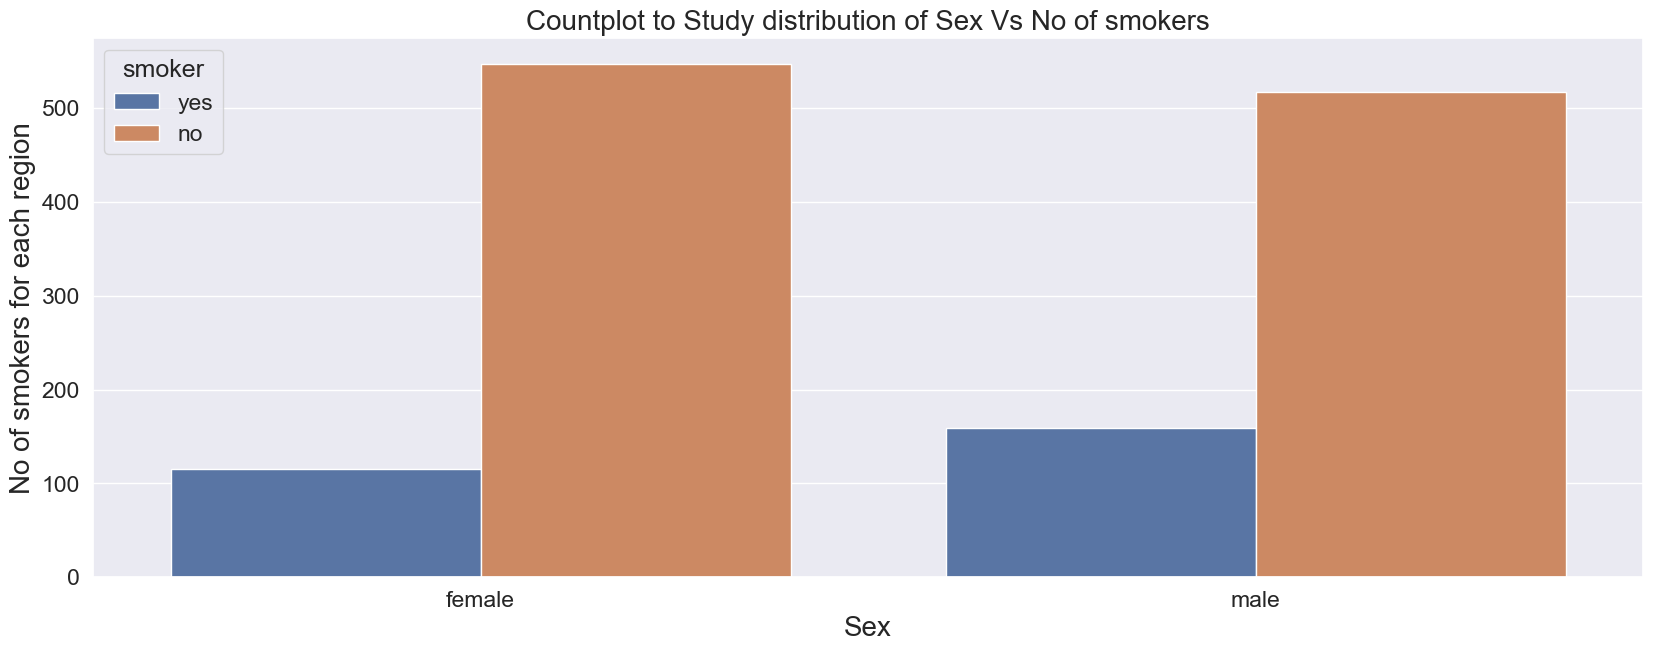

In [20]:
plt.figure(figsize=(20,7))
font = {'size':20}
sns.set(font_scale=1.5)
sns.countplot(data=df, x='sex', hue='smoker');
plt.title('Countplot to Study distribution of Sex Vs No of smokers', fontdict=font)
plt.xlabel('Sex',fontdict=font)
plt.ylabel('No of smokers for each region',fontdict=font)
plt.show();

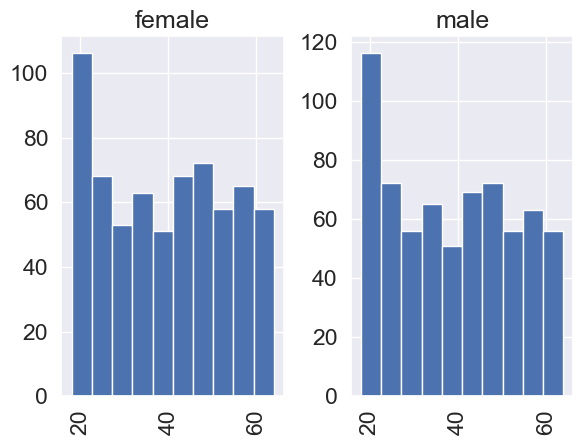

In [21]:
df.hist(by='sex', column='age');

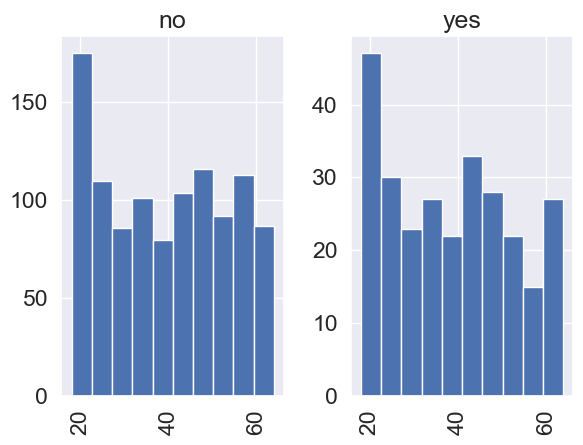

In [22]:
df.hist(by='smoker', column='age');

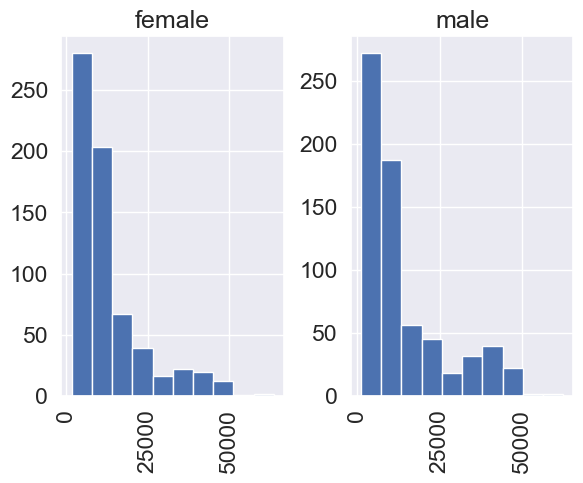

In [23]:
df.hist(by='sex', column='charges');

### Bi-variate distribution of every possible attribute pair

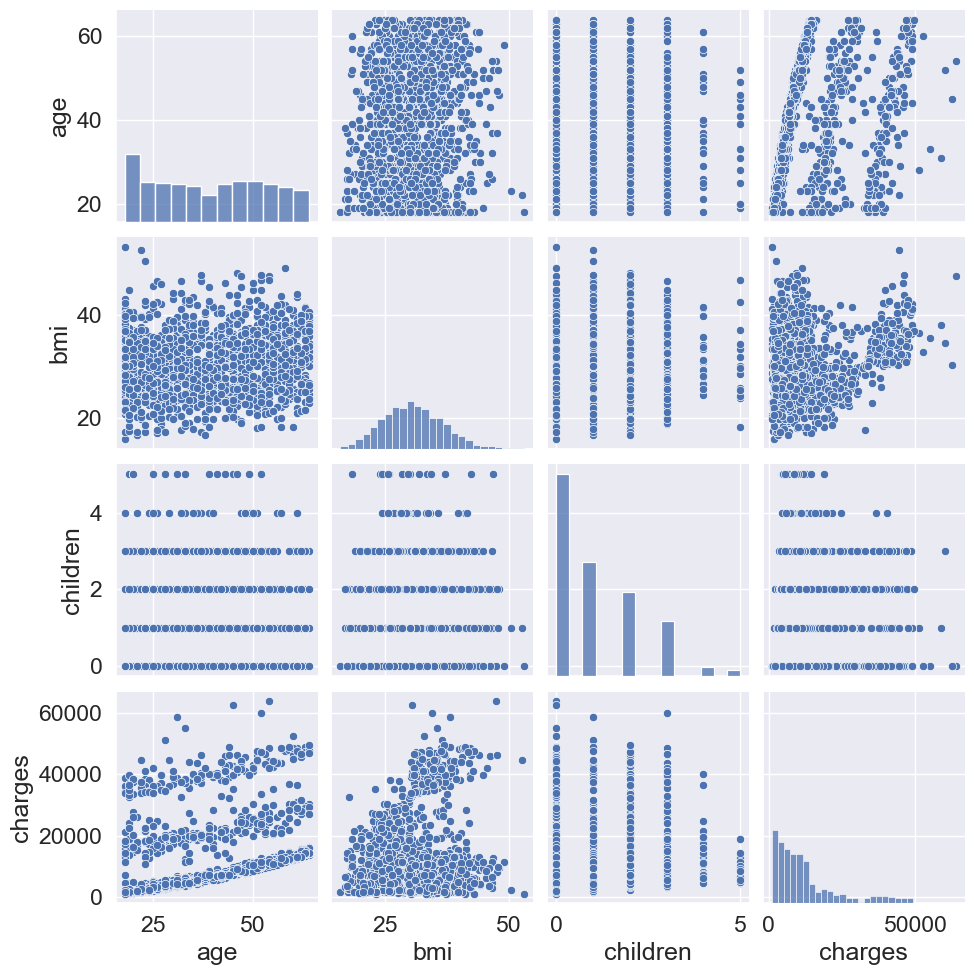

In [24]:
sns.pairplot(df);

# Check Correlation

To find out the correlation we will use the corr function and also we will plot a heatmap to visualise this correlation.

In [25]:
correlation_df = df.corr()
correlation_df

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


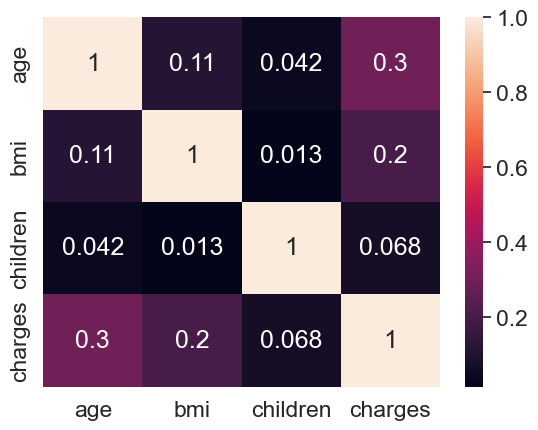

In [26]:
sns.heatmap(correlation_df,annot=True);

## Do charges of people who smoke differ significantly from the people who don't?

In [27]:
pd.pivot_table(data=df,index=['smoker','sex'], columns=['age'], values= 'charges', aggfunc='mean' )

age                      18            19           20            21  \
smoker sex                                                             
no     female   3716.739021   3879.902796   2483.68238   4516.335502   
       male     2695.672040   3219.922224   4862.54347   3211.126051   
yes    female  26862.269925  24896.857320  19522.50555  15359.104500   
       male    24779.460369  29105.608217  28615.79073  17942.106000   

age                      22            23            24            25  \
smoker sex                                                              
no     female   2705.702227   9287.658715   5954.275866   5835.104697   
       male     2396.333532   3946.097822   5057.542094   5233.096939   
yes    female  34751.568900  30994.219667  14571.890800  33900.653000   
       male    38684.146825  36189.101700  32129.818206  28497.063250   

age                      26            27  ...            55            56  \
smoker sex                                 ...                               
no     female   5310.006791   8387.425739  ...  13721.770856  11754.916000   
       male     3110.986362   3473.172895  ...  14074.119773  11288.052933   
yes    female  14455.644050  23995.524940  ...  44423.803000           NaN   
       male    26564.280200  27743.865725  ...  42303.692150  34064.256837   

age                      57            58            59            60  \
smoker sex                                                              
no     female  13283.378510  13185.958395  16917.952067  14537.164977   
       male    12227.531422  11641.749927  13356.851145  14947.218089   
yes    female  35556.426150           NaN  36787.784900  45008.955500   
       male    37946.977475  47496.494450  39577.592150  48892.068922   

age                      61            62            63            64  
smoker sex                                                             
no     female  17281.146602  15698.529055  14192.910881  15262.426207  
       male    14944.929754  14968.306541  14215.275565  16280.409340  
yes    female  36200.371750  27808.725100  38650.847450  37896.995563  
       male    40957.217433  40176.568050  47055.532100  41131.146000  

[4 rows x 47 columns]

## Does bmi of males differ significantly from that of females?

In [28]:
pd.pivot_table(data=df, index=['sex'], columns='age', values='bmi', aggfunc='mean')

age,18,19,20,21,22,23,24,25,26,27,...,55,56,57,58,59,60,61,62,63,64
sex,,,,,,,,,,,,,,,,,,,,,
female,32.930909,29.051667,29.421429,27.944615,28.859231,31.887143,28.200357,30.086538,28.901538,27.401786,...,31.625385,31.661538,28.330769,31.809231,30.69500,29.191364,31.273750,32.966250,30.067917,33.084545
male,29.855139,28.168143,31.763333,28.394667,33.019000,31.021786,30.085000,29.353667,29.886000,31.265357,...,32.274615,31.540385,33.358077,33.702917,30.43875,31.379167,33.938636,31.662273,33.947727,32.867727
